In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import normalize
import pickle

In [ ]:
with open('Word2Vec_X_data_colitis.pkl', 'rb') as f:
    X_data = pickle.load(f)
with open('Word2Vec_y_data_colitis.pkl', 'rb') as f:
    y_data = pickle.load(f)
with open('Word2Vec_embedding_matrix_colitis.pkl', 'rb') as f:
    embedding_matrix = pickle.load(f)
with open('Word2Vec_X_data_colitis_average.pkl', 'rb') as f:
    X_data_embedded = pickle.load(f)

In [ ]:
X_data

In [4]:
'''X_data_embedded = []
for row in range(X_data.shape[0]):
    summed_vector = np.zeros(150)
    for col in range(X_data.shape[1]):
        summed_vector = np.add(embedding_matrix[X_data[row][col]], summed_vector)
    summed_vector = np.true_divide(summed_vector, X_data.shape[1])
    X_data_embedded.append(summed_vector)
X_data_embedded = np.asarray(X_data_embedded)'''

In [42]:
'''with open('Word2Vec_X_data_colitis_average.pkl', 'wb') as f:
    pickle.dump(X_data_embedded, f)'''

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X_data_embedded, y_data, test_size=0.2)

In [138]:
list(y_train).count(1)

64

In [205]:
def smart_sample(X_train, y_train, num_positive, num_negative):
    X_train_positives = np.asarray([X_train[i] for i in range(X_train.shape[0]) if y_train[i] == 1])
    y_train_positives = np.asarray([y_train[i] for i in range(y_train.shape[0]) if y_train[i] == 1])
    X_train_negatives = np.asarray([X_train[i] for i in range(X_train.shape[0]) if y_train[i] == 0])
    y_train_negatives = np.asarray([y_train[i] for i in range(y_train.shape[0]) if y_train[i] == 0])
    
    percent_positive = num_positive/X_train_positives.shape[0]
    percent_negative = num_negative/X_train_negatives.shape[0]
    
    mask_positive = np.random.choice([False, True], len(X_train_positives), p=[1-percent_positive, percent_positive])
    mask_negative = np.random.choice([False, True], len(X_train_negatives), p=[1-percent_negative, percent_negative])
    
    X_train_positives_sampled = X_train_positives[mask_positive]
    y_train_positives_sampled = y_train_positives[mask_positive]
    X_train_negatives_sampled = X_train_negatives[mask_negative]
    y_train_negatives_sampled = y_train_negatives[mask_negative]
    
    X_data_smart_sampled = np.concatenate((X_train_positives_sampled, X_train_negatives_sampled), axis=0)
    y_data_smart_sampled = np.concatenate((y_train_positives_sampled, y_train_negatives_sampled), axis=0)
    
    data_sampled = np.column_stack( (X_data_smart_sampled, y_data_smart_sampled) )
    np.random.shuffle(data_sampled)
    X_train_sampled, y_train_sampled = data_sampled[:, 0 : data_sampled.shape[1]-1], data_sampled[:, data_sampled.shape[1]-1].ravel()

    return X_train_sampled, y_train_sampled

X_train_sampled, y_train_sampled = smart_sample(X_train, y_train, 64, 81)   

In [206]:
gnb = GaussianNB()

In [207]:
gnb.fit(X_train_sampled, y_train_sampled)

GaussianNB(priors=None, var_smoothing=1e-09)

In [208]:
y_pred = gnb.predict(X_test)

In [209]:
y_pred.astype(int)

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [210]:
y_test

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int64)

In [211]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8397435897435898


In [212]:
confusion_matrix(y_test, y_pred)

array([[126,  15],
       [ 10,   5]], dtype=int64)

In [213]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       141
           1       0.25      0.33      0.29        15

   micro avg       0.84      0.84      0.84       156
   macro avg       0.59      0.61      0.60       156
weighted avg       0.86      0.84      0.85       156



In [214]:
def show_confusion_matrix(confusion_matrix):
    SMALL_SIZE = 14
    MEDIUM_SIZE = 17
    BIGGER_SIZE = 50

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    ax = plt.subplot()
    confusion_matrix = normalize(confusion_matrix, axis=1, norm='l1')
    sns.heatmap(confusion_matrix ,annot=True, ax = ax, cmap='Reds')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title('Confusion Matrix', fontsize=23)
    ax.xaxis.set_ticklabels(['Normal', 'Colitis'])
    ax.yaxis.set_ticklabels(['Normal', 'Colitis'], va='center')
    #plt.matshow(confusion_matrix_array)
    #plt.colorbar()
    plt.show()

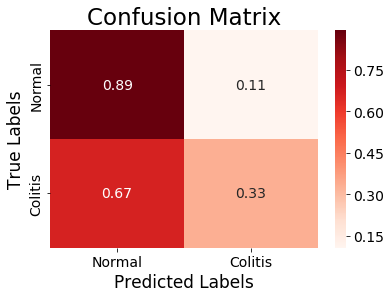

In [215]:
show_confusion_matrix(confusion_matrix(y_test, y_pred))